In [ ]:
!pip install dtw

In [1]:
import lasio
import pandas as pd
import os
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from dtw import dtw
import itertools
import operator
from operator import itemgetter

In [2]:
class my_dictionary(dict):
    def __init__(self):
        self = dict()
    def add(self, key, value):
        self[key] = value
        

In [3]:
targ_form = pd.read_csv('C:/Users/SMA_9/Desktop/HW/FieldWTPS1.csv',sep=';')
targ_form = targ_form.groupby(['Well','Surface']).aggregate({'MD':'mean'})
files = []
length = targ_form['MD'].size
for i in range(length):
    files.append( targ_form['MD'].index[i][0])
files = set(files)

In [ ]:
for i_file in files:
    try:
        cor = lasio.read('C://Users/SMA_9/Desktop/HW/path/' + i_file +'.las')
        SP = pd.DataFrame({'DEPT':cor['DEPT'], 'SP':cor['SP']})
        SP = SP.fillna(0)  
        SP = SP.query("SP != 0 & SP != 9999 & SP != (-9999)")
        if targ_form.loc[i_file.split('.')[0]].nunique()[0] ==2:
            top=targ_form.loc[(i_file.split('.')[0],'Top_Georg')][0]
            bottom = targ_form.loc[(i_file.split('.')[0],'U1-3_bot')][0]
        else:
            top=targ_form.loc[(i_file.split('.')[0],'Top_Georg')][0]
            bottom = top+100
        SP = SP.query("DEPT >= @top  & DEPT <= @bottom ")
        if SP.size>0:
            typic = SP.rename(columns={'DEPT':'Y','SP':'X'})
            typic.Y = (typic.Y-typic.Y.min())*100/(typic.Y.max()-typic.Y.min())
            typic.X = (typic.X-typic.X.min())*1/(typic.X.max()-typic.X.min())
            f = interpolate.interp1d(typic.Y.values, typic.X.values)
            ynew = np.arange(0,100,1)
            xnew = f(ynew)
            corotazh_total = pd.DataFrame({'Y':ynew[::-1],'X':xnew})
            corotazh_total.to_csv('C://Users/SMA_9/Desktop/HW/OutData2/'+i_file.split('.')[0]+'.csv')
    except Exception:  
        pass
    

In [ ]:
files = os.listdir(path ="C://Users/SMA_9/Desktop/HW/typical/CSV")
for i in files:
    typic = pd.read_csv('C://Users/SMA_9/Desktop/HW/typical/CSV/' + i, sep=';')
    typic.Y = (typic.Y-typic.Y.min())*55/(typic.Y.max()-typic.Y.min())
    typic.X = (typic.X-typic.X.min())*1/(typic.X.max()-typic.X.min())
    f = interpolate.interp1d(typic.Y.values, typic.X.values)
    xnew = f(np.arange(0,55,1))
    corotazh_total = pd.DataFrame({'Y':np.arange(0,55,1),'X':xnew})
    corotazh_total.to_csv('C://Users/SMA_9/Desktop/HW/typical/reb/' + i)
    

In [ ]:
files = os.listdir(path ="C://Users/SMA_9/Desktop/HW/OutData2")
data_1 = pd.DataFrame({'well':[],"typic":[],"value":[]})
g = ['1','2','3','4','5','6','7','8','9','10']
for u in files:
    my_dict = my_dictionary()
    SP = pd.read_csv('C://Users/SMA_9/Desktop/HW/OutData2/'+u)
    x = SP.X
    for i in g:
        SP1 = pd.read_csv('C://Users/SMA_9/Desktop/HW/typical/reb/'+i+'.csv',index_col=0 )
        y = SP1.X
        manhattan_distance = lambda x, y: np.abs(x - y)
        d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist = manhattan_distance)
        my_dict.add(i,d)
    for key, value in itertools.islice(sorted( my_dict.items(), key =  operator.itemgetter(1)),1):
        data_1 = pd.concat([data_1,pd.DataFrame({'well':[u],"typic":[key],"value":[value]})])
        
data_1.to_csv('C:/Users/SMA_9/Desktop/HW/mark.csv')
data_1.typic.value_counts()

In [22]:
data_1 = pd.DataFrame({"typic":[],"value":[]})
my_dict = my_dictionary()
SP = pd.read_csv('C://Users/SMA_9/Desktop/HW/OutData2/200R.csv')
x = SP.X
g = ['1','2','3','4','5','6','7','8','9','10']
for i in g:
    SP1 = pd.read_csv('C://Users/SMA_9/Desktop/HW/typical/reb/'+i+'.csv',index_col=0 )
    y = SP1.X
    manhattan_distance = lambda x, y: np.abs(x - y)
    d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist = manhattan_distance)
    my_dict.add(i,d)
for key, value in itertools.islice(sorted( my_dict.items(), key =  operator.itemgetter(1)),10):
    data_1 = pd.concat([data_1,pd.DataFrame({"typic":[key],"value":[value]})])

In [23]:
data_1


,typic,value
0,6,3.256170
0,8,3.564727
0,9,3.604692
0,4,3.956185
0,5,4.170605
0,7,4.554058
0,1,4.799513
0,10,6.086932
0,2,6.463387
0,3,7.187121


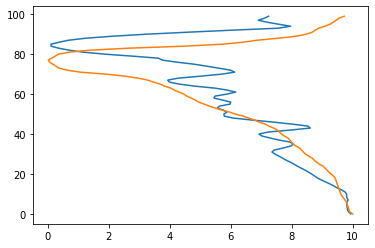

In [25]:
SP = pd.read_csv('C://Users/SMA_9/Desktop/HW/OutData/200R.csv',index_col=0 )
SP1 = pd.read_csv('C://Users/SMA_9/Desktop/HW/typical/rebuilt/3.csv' )
x = SP.X
y = SP.Y
X = SP1.X
Y = SP1.Y
plt.plot(x, y, '-', X, Y, '-')
plt.show()
